# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Representation with a Feature Cross

In this exercise, you'll experiment with different ways to represent features.

## Learning Objectives:

After doing this Colab, you'll know how to:

  * Use TensorFlow [preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) to represent features in different ways.
  * Represent features as [bins](https://developers.google.com/machine-learning/glossary/#bucketing).
  * Cross bins to create a [feature cross](https://developers.google.com/machine-learning/glossary/#feature_cross).

## The Dataset
  
Like several of the previous Colabs, this exercise uses the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

## Call the import statements

The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [62]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


## Load, scale, and shuffle the examples

The following code cell loads the separate .csv files and creates the following two pandas DataFrames:

* `train_df`, which contains the training set
* `test_df`, which contains the test set

The code cell then scales the `median_house_value` to a more human-friendly range and then shuffles the examples.

## Cargar, escalar y barajar los ejemplos

La siguiente celda de código carga los archivos .csv por separado y crea los siguientes dos DataFrames de pandas:

* `train_df`, que contiene el conjunto de entrenamiento.
* `test_df`, que contiene el conjunto de prueba.

Luego, la celda de código escala el `median_house_value` a un rango más amigable para los humanos y luego baraja los ejemplos.

In [63]:
# Load the dataset #set de datos
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0 #escalamos los datos en 1000, es decir seran m,il veces mas peque;os
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

## Represent latitude and longitude as floating-point values

Previous Colabs trained on only a single feature or a single synthetic feature. By contrast, this exercise trains on two features using **Input layers**.

A neighborhood's location is typically the most important feature in determining a house's value. The California Housing dataset provides two features, `latitude` and `longitude` that identify each neighborhood's location.

The following code cell defines two [`tf.keras.Input`](https://keras.io/api/layers/core_layers/input/) layers, one to represent `latitude` and another one to represent `longitude`, both as floating-point values.

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented.

## Representar la latitud y longitud como valores de punto flotante

Los Colabs anteriores se entrenaron solo con una característica o con una característica sintética única. En cambio, este ejercicio se entrena con dos características utilizando **capas de entrada** (**Input layers**).

La ubicación de un vecindario suele ser la característica más importante para determinar el valor de una casa. El conjunto de datos de viviendas de California proporciona dos características, `latitude` y `longitude`, que identifican la ubicación de cada vecindario.

La siguiente celda de código define dos capas [`tf.keras.Input`](https://keras.io/api/layers/core_layers/input/), una para representar `latitude` y otra para representar `longitude`, ambas como valores de punto flotante.

Esta celda de código especifica las características con las que entrenarás finalmente el modelo y cómo se representará cada una de esas características.


In [64]:
# Keras Input tensors of float values.
inputs = {
    'latitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='latitude'),
    'longitude':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='longitude')
}

## Define functions that create and train a model, and a plotting function

The following code defines three functions:

  * `create_model`, which tells TensorFlow to build a linear regression model based on the inputs and outputs provided.
  * `train_model`, which will ultimately train the model from training set examples.
  * `plot_the_loss_curve`, which generates a loss curve.

## Define funciones que crean y entrenan un modelo, y una función de visualización

El siguiente código define tres funciones:

  * `create_model`, que indica a TensorFlow que construya un modelo de regresión lineal basado en las entradas y salidas proporcionadas.
  * `train_model`, que entrenará finalmente el modelo con ejemplos del conjunto de entrenamiento.
  * `plot_the_loss_curve`, que genera una curva de pérdida.

In [65]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_inputs, my_outputs, my_learning_rate):

  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(
      learning_rate=my_learning_rate),
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


## Train the model with floating-point representations

The following code cell calls the functions you just created to train, plot, and evaluate a model.

## Entrenar el modelo con representaciones de punto flotante

La siguiente celda de código llama a las funciones que acabas de crear para entrenar, visualizar y evaluar un modelo.

Epoch 1/30


c:\Users\PERSONAL\OneDrive\Documentos\PROGRAMACION GITHUB\MACHINE LEARNING\env\lib\site-packages\keras\src\engine\functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 0s 750us/step - loss: 14498.4521 - root_mean_squared_error: 120.4095
Epoch 2/30
170/170 [==============================] - 0s 868us/step - loss: 13440.6885 - root_mean_squared_error: 115.9340
Epoch 3/30
170/170 [==============================] - 0s 768us/step - loss: 13391.8027 - root_mean_squared_error: 115.7230
Epoch 4/30
170/170 [==============================] - 0s 863us/step - loss: 13358.1182 - root_mean_squared_error: 115.5773
Epoch 5/30
170/170 [==============================] - 0s 787us/step - loss: 13299.1260 - root_mean_squared_error: 115.3218
Epoch 6/30
170/170 [==============================] - 0s 837us/step - loss: 13276.0635 - root_mean_squared_error: 115.2218
Epoch 7/30
170/170 [==============================] - 0s 1ms/step - loss: 13239.3721 - root_mean_squared_error: 115.0625
Epoch 8/30
170/170 [==============================] - 0s 772us/step - loss: 13205.0264 - root_mean_squared_error: 114.9131
Epoch 9/30
170/170 [=========

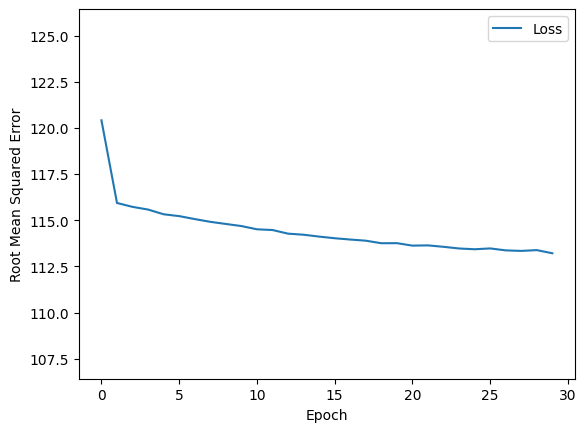


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 766us/step - loss: 12164.0264 - root_mean_squared_error: 110.2906


[12164.0263671875, 110.29064178466797]

In [66]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# The two Input layers are concatenated so they can be passed as a single
# tensor to a Dense layer.
preprocessing_layer = tf.keras.layers.Concatenate()(inputs.values())

dense_output = layers.Dense(units=1, name='dense_layer')(preprocessing_layer)

outputs = {
  'dense_output': dense_output
}

# Create and compile the model's topography.
my_model = create_model(inputs, outputs, learning_rate)

# To view a PNG of this model's layers, uncomment the call to
# `tf.keras.utils.plot_model` below. After running this code cell, click
# the file folder on the left, then the `my_model.png` file.
# tf.keras.utils.plot_model(my_model, "my_model.png", show_shapes=True)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 1: Why aren't floating-point values a good way to represent latitude and longitude?

Are floating-point values a good way to represent `latitude` and `longitude`?

## Tarea 1: ¿Por qué los valores de punto flotante no son una buena manera de representar la latitud y longitud?

¿Son los valores de punto flotante una buena manera de representar `latitude` y `longitude`?

In [67]:
# No. Representing latitude and longitude as
# floating-point values does not have much
# predictive power. For example, neighborhoods at
# latitude 35 are not 36/35 more valuable
# (or 35/36 less valuable) than houses at
# latitude 36.

# Representing `latitude` and `longitude` as
# floating-point values provides almost no
# predictive power. We're only using the raw values
# to establish a baseline for future experiments
# with better representations.

# No. Representar la latitud y longitud como valores de punto flotante no tiene mucha capacidad predictiva. 
# Por ejemplo, los vecindarios en la latitud 35 no son 36/35 más valiosos (o 35/36 menos valiosos) que las casas en la latitud 36.

# Representar `latitude` y `longitude` como valores de punto flotante proporciona casi ninguna capacidad predictiva. 
# Solo estamos utilizando los valores sin procesar para establecer un punto de referencia para futuros experimentos con representaciones más efectivas.

## Represent latitude and longitude in buckets

The following code cell represents latitude and longitude in buckets (bins). Each bin represents all the neighborhoods within a single degree. For example,
neighborhoods at latitude 35.4 and 35.8 are in the same bucket, but neighborhoods in latitude 35.4 and 36.2 are in different buckets.

The model will learn a separate weight for each bucket. For example, the model will learn one weight for all the neighborhoods in the "35" bin, a different weight for neighborhoods in the "36" bin, and so on. This representation will create approximately 20 buckets:

  * 10 buckets for `latitude`.
  * 10 buckets for `longitude`.


## Representar la latitud y longitud en intervalos

La siguiente celda de código representa la latitud y longitud en intervalos (buckets o contenedores). Cada contenedor representa todos los vecindarios dentro de un solo grado. Por ejemplo, los vecindarios en la latitud 35.4 y 35.8 están en el mismo contenedor, pero los vecindarios en la latitud 35.4 y 36.2 están en contenedores diferentes.

El modelo aprenderá un peso separado para cada contenedor. Por ejemplo, el modelo aprenderá un peso para todos los vecindarios en el contenedor "35", un peso diferente para los vecindarios en el contenedor "36", y así sucesivamente. Esta representación creará aproximadamente 20 contenedores:

  * 10 contenedores para `latitude`.
  * 10 contenedores para `longitude`.

In [68]:
resolution_in_degrees = 1.0 #Configuración de Resolución:
#Esta variable establece la resolución para discretizar los valores de latitud y longitud. Representa el tamaño de los intervalos o "buckets".

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))
print("latitude boundaries: " + str(latitude_boundaries))
#Esta línea genera una lista de límites de latitud basada en los valores mínimos y máximos de latitud en los datos de entrenamiento (train_df). 
# Utiliza NumPy para crear un array de valores con la resolución especificada, y luego lo convierte en una lista.

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Number of categories is the length of latitude_boundaries plus one.
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(latitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

print("longitude boundaries: " + str(longitude_boundaries))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Number of categories is the length of longitude_boundaries plus one.
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(longitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)

# Concatenate latitude and longitude into a single tensor as input for the Dense layer.
concatenate_layer = tf.keras.layers.Concatenate()([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(concatenate_layer)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

latitude boundaries: [32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
longitude boundaries: [-124.0, -123.0, -122.0, -121.0, -120.0, -119.0, -118.0, -117.0, -116.0, -115.0]


## Train the model with bucket representations

Run the following code cell to train the model with bucket representations rather than floating-point representations:

## Entrenar el modelo con representaciones por intervalos

Ejecuta la siguiente celda de código para entrenar el modelo con representaciones por intervalos en lugar de representaciones de punto flotante:

Epoch 1/35
170/170 [==============================] - 0s 799us/step - loss: 52121.5547 - root_mean_squared_error: 228.3015
Epoch 2/35
170/170 [==============================] - 0s 874us/step - loss: 44726.1875 - root_mean_squared_error: 211.4857
Epoch 3/35
170/170 [==============================] - 0s 713us/step - loss: 38119.4727 - root_mean_squared_error: 195.2421
Epoch 4/35
170/170 [==============================] - 0s 786us/step - loss: 32297.0625 - root_mean_squared_error: 179.7138
Epoch 5/35
170/170 [==============================] - 0s 714us/step - loss: 27279.1836 - root_mean_squared_error: 165.1641
Epoch 6/35
170/170 [==============================] - 0s 893us/step - loss: 23019.0391 - root_mean_squared_error: 151.7203
Epoch 7/35
170/170 [==============================] - 0s 876us/step - loss: 19523.5488 - root_mean_squared_error: 139.7267
Epoch 8/35
170/170 [==============================] - 0s 775us/step - loss: 16691.0957 - root_mean_squared_error: 129.1940
Epoch 9/35
170/1

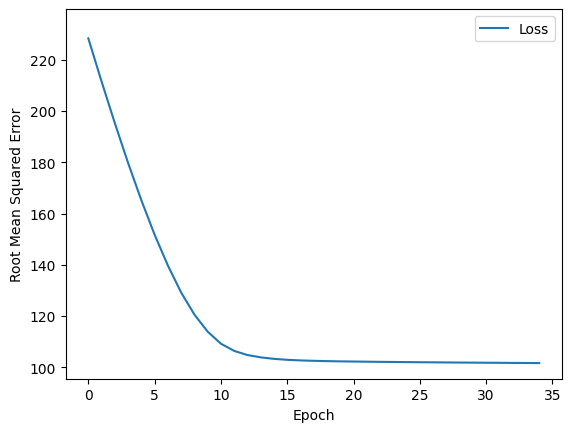


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 10197.4824 - root_mean_squared_error: 100.9826


[10197.482421875, 100.98259735107422]

In [69]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model.
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 2: Did buckets outperform floating-point representations?

Compare the model's `root_mean_squared_error` values for the two representations (floating-point vs. buckets)?  Which model produced lower losses?

## Tarea 2: ¿Superaron los buckets a las representaciones de punto flotante?

Compara los valores de `root_mean_squared_error` del modelo para las dos representaciones (punto flotante frente a buckets). ¿Qué modelo produjo pérdidas más bajas?

In [70]:

# Bucket representation outperformed
# floating-point representations.
# However, you can still do far better.

# La representación mediante buckets superó
# a las representaciones de punto flotante.
# Sin embargo, aún se puede mejorar significativamente.

## Task 3: What is a better way to represent location?

Buckets are a big improvement over floating-point values. Can you identify an even better way to identify location with `latitude` and `longitude`?


## Tarea 3: ¿Cuál es una forma mejor de representar la ubicación?

Los buckets representan una mejora significativa sobre los valores de punto flotante. ¿Puedes identificar una forma aún mejor de representar la ubicación con `latitud` y `longitud`?

In [71]:
# Representing location as a feature cross should
# produce better results.

# In Task 2, you represented latitude in
# one-dimensional buckets and longitude in
# another series of one-dimensional buckets.
# Real-world locations, however, exist in
# two dimensions. Therefore, you should
# represent location as a two-dimensional feature
# cross. That is, you'll cross the 10 or so latitude
# buckets with the 10 or so longitude buckets to
# create a grid of 100 cells.

# The model will learn separate weights for each
# of the cells.


# Representar la ubicación como un cruce de características debería
# producir mejores resultados.

# En la Tarea 2, representaste la latitud en
# buckets unidimensionales y la longitud en
# otra serie de buckets unidimensionales.
# Sin embargo, las ubicaciones del mundo real existen en
# dos dimensiones. Por lo tanto, deberías
# representar la ubicación como un cruce de características bidimensional.
# Es decir, cruzarás los 10 o más buckets de latitud con los
# 10 o más buckets de longitud para crear una cuadrícula de 100 celdas.

# El modelo aprenderá pesos separados para cada
# de las celdas.

## Represent location as a feature cross

The following code cell represents location as a feature cross. That is, the following code cell first creates buckets and then crosses the latitude and longitude features using a `HashedCrossing` layer.



In [72]:
resolution_in_degrees = 0.4 # ajutamos este valor
#probando vemos que ajsutando el 0.4 es la mejor opcion!

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Cross the latitude and longitude features into a single one-hot vector.
feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundaries) * len(longitude_boundaries),
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(feature_cross)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

Invoke the following code cell to test your solution for Task 3. Please ignore the warning messages.
Invoca la siguiente celda de código para probar tu solución para la Tarea 3. Por favor, ignora los mensajes de advertencia.

Epoch 1/35
170/170 [==============================] - 0s 932us/step - loss: 53722.4844 - root_mean_squared_error: 231.7811
Epoch 2/35
170/170 [==============================] - 0s 945us/step - loss: 48967.0938 - root_mean_squared_error: 221.2851
Epoch 3/35
170/170 [==============================] - 0s 856us/step - loss: 44510.7461 - root_mean_squared_error: 210.9757
Epoch 4/35
170/170 [==============================] - 0s 952us/step - loss: 40368.7695 - root_mean_squared_error: 200.9198
Epoch 5/35
170/170 [==============================] - 0s 939us/step - loss: 36502.5234 - root_mean_squared_error: 191.0563
Epoch 6/35
170/170 [==============================] - 0s 920us/step - loss: 32924.8555 - root_mean_squared_error: 181.4521
Epoch 7/35
170/170 [==============================] - 0s 944us/step - loss: 29660.2148 - root_mean_squared_error: 172.2214
Epoch 8/35
170/170 [==============================] - 0s 847us/step - loss: 26694.0117 - root_mean_squared_error: 163.3830
Epoch 9/35
170/1

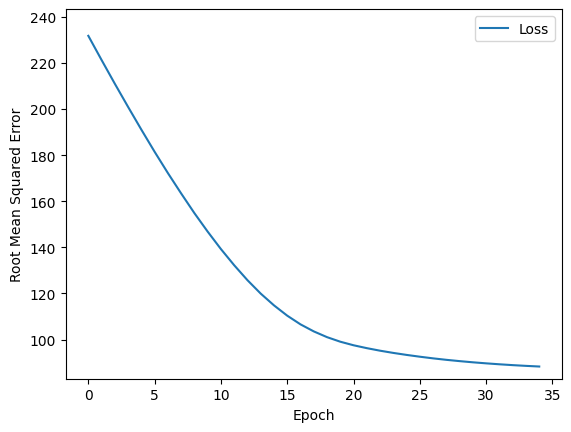


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 970us/step - loss: 7855.3521 - root_mean_squared_error: 88.6304


[7855.35205078125, 88.63042449951172]

In [73]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer:
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Task 4: Did the feature cross outperform buckets?

Compare the model's `root_mean_squared_error` values for the two representations (buckets vs. feature cross)?  Which model produced
lower losses?


## Tarea 4: ¿Superó el cruce de características a los buckets?

Compara los valores de `root_mean_squared_error` del modelo para las dos representaciones (buckets frente a cruce de características). ¿Qué modelo produjo pérdidas más bajas?

In [74]:
# Yes, representing these features as a feature
# cross produced much lower loss values than
# representing these features as buckets

# Sí, representar estas características como un cruce de características produjo valores de pérdida mucho más bajos que representar estas características como buckets.

## Task 5: Adjust the resolution of the feature cross

Return to the code cell in the "Represent location as a feature cross" section. Notice that `resolution_in_degrees` is set to 1.0. Therefore, each cell represents an area of 1.0 degree of latitude by 1.0 degree of longitude, which corresponds to a cell of 110 km by 90 km.  This resolution defines a rather large neighborhood.

Experiment with `resolution_in_degrees` to answer the following questions:

  1. What value of `resolution_in_degrees` produces the best results (lowest loss value)?
  2. Why does loss increase when the value of `resolution_in_degrees` drops below a certain value?

Finally, answer the following question:

  3. What feature (that does not exist in the California Housing Dataset) would
     be a better proxy for location than latitude X longitude.


## Tarea 5: Ajusta la resolución del cruce de características

Regresa a la celda de código en la sección "Representar la ubicación como un cruce de características". Observa que `resolution_in_degrees` está establecido en 1.0. Por lo tanto, cada celda representa un área de 1.0 grado de latitud por 1.0 grado de longitud, lo que corresponde a una celda de 110 km por 90 km. Esta resolución define un vecindario bastante grande.

Experimenta con `resolution_in_degrees` para responder las siguientes preguntas:

  1. ¿Qué valor de `resolution_in_degrees` produce los mejores resultados (valor de pérdida más bajo)?
  2. ¿Por qué la pérdida aumenta cuando el valor de `resolution_in_degrees` baja por debajo de cierto valor?

Finalmente, responde a la siguiente pregunta:

  3. ¿Qué característica (que no existe en el conjunto de datos de viviendas de California) sería un mejor proxy para la ubicación que latitud x longitud?

In [75]:
#1. A resolution of ~0.4 degree provides the best
#   results.

#2. Below ~0.4 degree, loss increases because the
#   dataset does not contain enough examples in
#   each cell to accurately predict prices for
#   those cells.

#3. Postal code would be a far better feature
#   than latitude X longitude, assuming that
#   the dataset contained sufficient examples
#   in each postal code.


#1. Una resolución de aproximadamente 0.4 grados proporciona los mejores resultados.

#2. Por debajo de ~0.4 grados, la pérdida aumenta porque el conjunto de datos no contiene suficientes ejemplos en cada celda para predecir con precisión los precios para esas celdas.

#3. El código postal sería una característica mucho mejor que la latitud x longitud, siempre y cuando el conjunto de datos contenga suficientes ejemplos en cada código postal.